<p style="align: center;">
    <img align=center src="../img/dls_logo.jpg" width=500 height=500>
</p>

<h1 style="text-align: center;">
    <b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b>
</h1>

---

<h1 style="text-align: center;">
    Производная и градиент
</h1>

## Производная функции одной переменной

Для начала мы будем рассматривать производные функций одной переменной, потом обобщим это понятие на функции многих переменных.

### Смысл производной

Для начала рассмотрим функцию $F(x) = x^4 + 5x^3 - 10x$ на интервале $x \in[-5, 2]$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

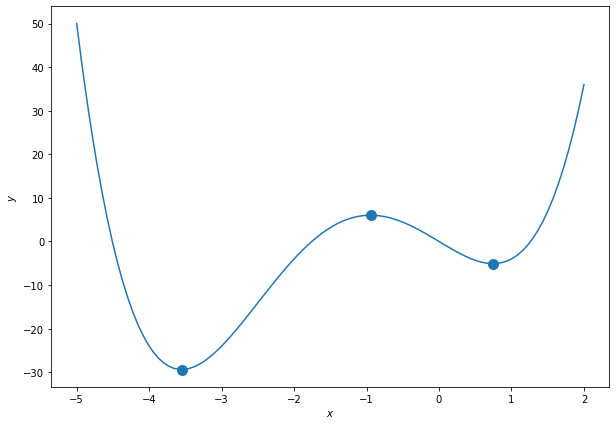

In [20]:
def F(x):
    return x**4 + 5 * x**3 - 10 * x

x = np.linspace(-5, 2, 100)
y = F(x)

plt.figure(figsize=(10, 7))
plt.plot(x, y)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.scatter([-3.5518, -0.9439, 0.7457], [F(-3.5518), F(-0.9439), F(0.7457)], lw=5)
plt.show()

Как мы видим, эта функция имеет два локальных минимума в точках $x \approx -3.5518$ и $x \approx 0.7457$, один локальный максимум в точке $x \approx -0.9439$, а также она убывает на отрезках $[-5, -3.5518]$ и $[-0.9439, 0.7457]$ и возрастает на отрезках $[-3.5518, -0.9439]$ и $[0.7457, 2]$.

Посмотрим на график в местах, где функция убывает. Это отрезки $[-5, -3.5518]$ и $[-0.9439, 0.7457]$. Заметим, что на этих двух отрезках функция убывает с разной скоростью. На отрезке $[-5, -3.5518]$ она убывает быстрее (уклон функции более крутой, при изменении координаты $x$ на $1$ значение функции $y$ меняется быстро), а на отрезке $[-0.9439, 0.7457]$ функция убывает медленнее (при изменении координаты $x$ на $1$ значение функции $y$ меняется на меньше число, чем на предыдущем отрезке).

Давайте научимся измерять скорость изменения функции и введём строгие определения.

<img src="../img/linear_models_derivative_1.jpg">

Рассмотрим точки $(x_1, y_1) = (-5, 50)$ и $(x_2, y_2) \approx (-0.8, -5)$ графика функции (см. рисунок). Отступим от них по координате $x$ на одинаковый шаг $\Delta x > 0$, попадём на другие точки на графике. При этом величины координат $y_1$ и $y_2$ тоже поменяются на некоторые величины $\Delta y_1$ и $\Delta y_2$. 

Добавленные величины $\Delta y_1$ и $\Delta y_2$ назваются **приращениями функции**, а величина $\Delta x$ - **приращением аргумента**.

Заметим, что $\Delta y_2 < \Delta y_1$.

Рассмотрим тогда отношения $\frac{\Delta y_1}{\Delta x}$ и $\frac{\Delta y_2}{\Delta x}$. Можно сказать, что эти отношения являются мерилами скорости убывания функции на отрезках $[x_1, x_1 + \Delta x]$ и $[x_2, x_2 + \Delta x]$ соответственно. Действительно, отношение $\frac{\Delta y_1}{\Delta x}$ показывает, на сколько в среднем меняется значение функции при изменении значения аргумента на $1$. 

**Чем больше отношение $\frac{\Delta y}{\Delta x}$ по модулю, тем выше скорость изменнения функции**.

Можно привести аналогию с горами - рассмотрим график как дорогу, идущую то в гору, то с горы. Отношение $\frac{\Delta y}{\Delta x}$ показывает, насколько сильно меняется высота дороги на каждый метр пути относительно земли (т.е. насколько быстро меняется высота горы).

Заметим, что в примере выше приращения $\Delta y_1$ и $\Delta y_2$ - отрицательные числа (функция убывает). Значит, и отношение $\frac{\Delta y_1}{\Delta x} < 0$.

В местах, где функция возрастает, отношение $\frac{\Delta y_1}{\Delta x}$ будет положительно.

**Если $\frac{\Delta y_1}{\Delta x} > 0$, то функция возрастает, если $\frac{\Delta y_1}{\Delta x} < 0$ - убывает**.

**Таким образом, исследуя приращение функции при изменении аргумента в некоторой точке, можно делать выводы об изменении функции и о скорости изменения функции в окрестности этой точки**.

---

Теперь встает логичный вопрос: какую величину $\Delta x$ лучше всего выбирать, чтобы лучше оценить поведение функции в окрестности некоторой точки $(x, y)$?

Давайте рассмотрим пример, где мы выбрали величину $\Delta x$ больше, чем в предыдущем примере:

<img src="../img/linear_models_derivative_2.jpg">

Мы находились в точке $(x_2, y_2) \approx (0.8, 5)$, сдвинулись по координате $x$ на величину $\Delta x' > \Delta x$ и попали в точку $(x_2 + \Delta x', y_2 + \Delta y'_2)$. Заметим, что $\Delta y'_2 > 0$ и отношение $\frac{\Delta y'_2}{\Delta x'} > 0$. По опыту рассуждений выше, это нам говорит о том, что на отрезке $[x_2, x_2 + \Delta x']$ функция возрастает в среднем на $\frac{\Delta y'_2}{\Delta x'}$ при изменении значения аргумента на $1$. 

Но так ли это?

На графике мы явно видим, что в точке $(x_2, y_2)$ функция убывает, а затем возрастает и приходит в точку $(x_2 + \Delta x', y_2 + \Delta y'_2)$. То есть, наш вывод о том, как ведет себя график в окрестности точки $(x_2, y_2)$, немного неточен. Отступив от точки $(x_2, y_2)$ на слишком большой шаг $\Delta x'$, мы "перешагнули" через точку локального минимума функции и ошибочно решили, что в окрестности точки $(x_2, y_2)$ функция возрастает.

Это как если бы вы стояли на вершине горы, потом спустились с нее, потом поднялись на другую гору такой же высоты и сказали: "ну, моя итоговая высота изменилась на $0$ метров, значит, вся моя дорога была прямая".

Значит, чтобы делать верные выводы о том, как ведет себя функция в окрестности некоторой точки, нужно брать $\Delta x$ маленьким. Но насколько маленьким?

Ответ такой: бесконечно маленьким. Никакая конечная величина $\Delta x$ не подойдет. Действительно, для любой величины $\Delta x$ я могу найти такую функцию, что ее график будет выглядеть так:

<img src="../img/linear_models_derivative_3.jpg">

То есть, мы все равно перескочим через точку локального минимума и не поймём, что функция в точке убывала, а не возрастала. 

Ну и, напоследок, даже если на отрезке $[x, x + \Delta x]$ нет локальных минимумов/максимумов и функция постоянно убывает/возрастает, она может возрастать/убывать с разной скоростью. Например, функция $F(x) = x^4$ на отрезке $[1, 15]$ начинает возрастать быстрее (график становится более крутым) при приближении к $x = 15$. И делать вывод о скорости роста функции в точке $1$ как о средней скорости роста функции на отрезке $[1, 15]$ не совсем корректно.

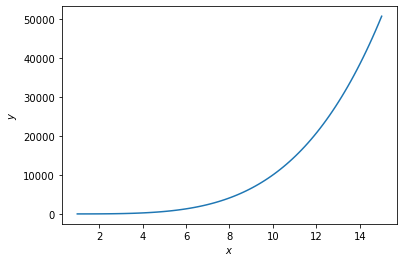

In [21]:
def F(x):
    return x**4

x = np.linspace(1, 15, 100)
y = F(x)

plt.plot(x, y)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

**Что же делать?**

Здесь нам пригодится понятие предела функции, рассмотренное в ноутбуке про функции. 

Давайте возьмём некоторую $\Delta x > 0$ и устремим её к нулю. То есть, будем её постепенно уменьшать. Другими словами - построим последовательность чисел, начиная с $\Delta x > 0$, предел которой равен $0$.

Например, мы можем взять $\Delta x = 1$ и последовательность чисел

$$
1, \frac{1}{2}, \frac{1}{3}, \ldots \frac{1}{n}, \ldots
$$

Теперь возьмем функцию $F$ и некоторую точку этой функции $(x, y)$. Рассмотрим приращение $x + \Delta x$ и соответствующее приращение функции $y + \Delta y = F(x + \Delta x)$. Будем постепенно уменьшать приращения $\Delta x$, подставляя вместо $\Delta x$ члены заданной выше последовательности. Получим последовательность $\Delta y$:

$$
\Delta y_1 = F(x + 1) - F(x)
$$

$$
\Delta y_2 = F(x + \frac{1}{2}) - F(x)
$$

$$
\Delta y_3 = F(x + \frac{1}{3}) - F(x)$$

$$
\cdots
$$

И, соответственно, получим последовательность отношений $\frac{\Delta y}{\Delta x}$:

$$
\frac{\Delta y_1}{1} = \frac{F(x + 1) - F(x)}{1}
$$

$$
\frac{\Delta y_1}{2} = \frac{F(x + 2) - F(x)}{2}
$$

$$
\frac{\Delta y_1}{3} = \frac{F(x + 3) - F(x)}{3}
$$

$$
\cdots
$$

Уменьшая $\Delta x$, мы будем отходить от точки $(x, y)$ всё меньше и **отношение $\frac{\Delta y}{\Delta x}$ будет всё точнее отражать характер поведения функции $F$ вблизи точки $(x, y)$**.

Нетрудно догадаться, что итоговая величина, которая наиболее точно отразит характер поведения функции $F$ вблизи точки $(x, y)$ есть предел функции $\frac{\Delta y}{\Delta x} = \frac{F(x + \Delta x) - F(x)}{\Delta x}$ при $\Delta x$ стремящейся к нулю. То есть, мы лучшим образом опишем поведение функции около точки $(x, y)$, когда мы отходим от точки $(x, y)$ на бесконечно малое расстояние.

Эта величина называется **производной функции $F$ в точке $x$**.

Записывается это так:

$$
F'(x) = \lim_{\Delta x \to 0} \frac{F(x + \Delta x) - F(x)}{\Delta x}
$$

Заметим, что последовательность $\Delta x = 1, \frac{1}{2}, \frac{1}{3}, \ldots \frac{1}{n}, \ldots$ никогда не дойдёт до $0$, поэтому знаменатель в формуле $F'(x)$ всегда определён.

Этот предел может существовать, а может не существовать. Если он существует, то функция $F$ называется **дифференцируемой в точке** $(x, y)$. Если функция дифференцируема во всех точках, то функция просто называется дифференцируемой.

### Определение производной

**Производной функции $F$ в точке $x$ называется следующий предел, если он существует:**

$$
F'(x) = \lim_{\Delta x \to 0} \frac{F(x + \Delta x) - F(x)}{\Delta x}
$$

Также говорят - производная функции $F$ по $x$.

Производная функции в точке **показывает характер изменения функции в точке**, а именно:

1. **Модуль значения производной говорит о скорости убывания/возрастания функции.** Если в одной точке производная функции равна $5$, а в другой - $3$, то в первой точке функция возрастает быстрее, чем во второй.

2. **Знак производной показывает характер изменения функции в точке.** То есть, если производная положительна, это значит, что функция в точке возрастает. Если производная отрицательна, это значит, что функция в точке убывает.

#### Пример

Рассмотрим функцию $F(x) = x^2$ и точки $(-10, -100)$, $(2, 4)$ и $(25, 625)$:

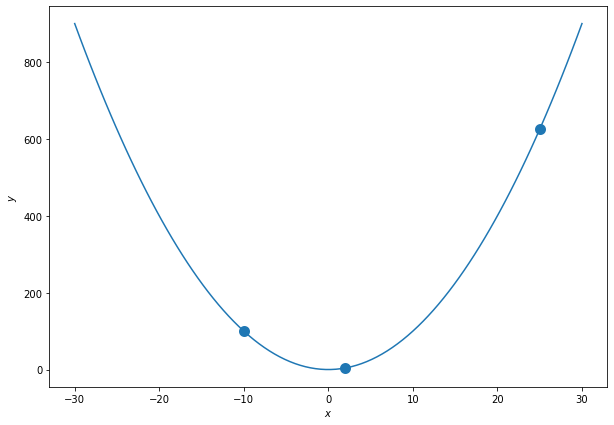

In [22]:
def F(x):
    return x**2

x = np.linspace(-30, 30, 100)
y = F(x)

plt.figure(figsize=(10, 7))
plt.plot(x, y)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.scatter([-10, 2, 25], [F(-10), F(2), F(25)], lw=5)
plt.show()

Производная функции $F$ в точке $x=-10$ равна $-20$, в точке $x=2$ равна $4$ , в точке $x=25$ равна $50$ (вычислять производные мы научимся позже).

Заметим, что производная в точках $x=2$ и $x=25$ положительна, а в точке $-10$ - отрицательна. Это говорит о том, что в точках $x=2$ и $x=25$ функция возрастает, а в точке $-10$ - убывает. И это правда так - посмотрите на график.

Также заметим, что производная в точке $x=25$ по модулю больше, чем производная в точках $x=-10$ и $x=2$. Это значит, что скорость возрастания функции $F$ в точке $x=25$ выше, чем скорость возрастания в точке $x=2$ и скорость убывания в точке $x=-10$. И это тоже видно на графике.

#### Пример 2

Вычислим производную функции $F(x) = -2x - 1$ в точке $x = x_0$ по определению:

$$
F'(x_0) = \lim_{\Delta x \to 0} \frac{F(x_0 + \Delta x) - F(x_0)}{\Delta x} = \lim_{\Delta x \to 0} \frac{-2(x_0 + \Delta x) - 1 + 2x_0 + 1}{\Delta x} = \lim_{\Delta x \to 0} \frac{-2 \Delta x}{\Delta x} = \lim_{\Delta x \to 0} -2 = -2
$$

Заметим, что получившееся значение производной $-2$ не зависит от $x_0$, а значит, производная функции $F(x) = -2x - 1$ во всех точках равна $-2$.

Также здесь нам не потребовалось вычислять предел, потому что $\Delta x$ просто сократилось!

#### Пример 3

Вычислим производную функции $F(x) = 2x^2$ в точке $x = x_0$ по определению:

$$
F'(x_0) = \lim_{\Delta x \to 0} \frac{F(x_0 + \Delta x) - F(x_0)}{\Delta x} = \lim_{\Delta x \to 0} \frac{2(x_0 + \Delta x)^2 - 2x_0^2}{\Delta x} = \lim_{\Delta x \to 0} \frac{4x_0 \Delta x + 2\Delta x^2}{\Delta x} = \lim_{\Delta x \to 0} (4x_0 + 2 \Delta x) = \lim_{\Delta x \to 0} 4x_0 + \lim_{\Delta x \to 0} 2 \Delta x = 4x_0
$$

При $\Delta x \to 0$ предел выражения $2 \Delta x$ есть $0$, поэтому остается только $4x_0$.

Итак, в точке $x_0$ производная функции $F(x) = 2x^2$ равна $4x_0$.

Подставляя вместо $x_0$ числа, можем получать значения производной в точках. Например, $F'(5) = 4 \cdot 5 = 20$.

**P. S.** Может быть, вы сейчас задаетесь вопросом, зачем нам нужна производная, чтобы определять возрастание/убывание/точки минимума функции, ведь мы можем нарисовать график и увидеть всё, не считая никаких производных. Подумайте о том, что сейчас мы введём производные функций многих переменных, на графики которых посмотреть не получится - они не помещаются в трёхмерное пространство. Поэтому исследовать такие функции остается только с помощью производных.

## Производная как функция

До сих пор мы говорили о производной функции $F$ в конкретной точке $x$. Давайте теперь допустим, что функция $F$ дифференцируема на всей своей области определения, то есть имеет производную во всех точках.

Тогда можно определить производную функции $F$ как функцию от аргумента $x$:

$$
F'(x) = \lim_{\Delta x \to 0} \frac{F(x + \Delta x) - F(x)}{\Delta x}
$$

То есть, **производная функции есть тоже функция**.

#### Пример 4

Рассмотрим ту же функцию $F(x) = x^2$. Её производная есть функция $F'(x) = 2x$ (вычислять производные мы научимся позже).

Давайте подставим точки, рассмотренные в предыдущем примере, в эту функцию:

$$
F'(-10) = 2 \cdot (-10) = -20
$$

$$
F'(2) = 2 \cdot 2 = 4
$$

$$
F'(35) = 2 \cdot 25 = 50
$$

Всё сходится!

#### Пример 5

В примере 2 мы рассмотрели функцию $F(x) = -2x - 1$ и выяснили, что её производная во всех точках равна $-2$. Это значит, что функция производной есть:

$$
F'(x) = -2
$$

#### Пример 6

В примере 3 мы рассмотрели функцию $F(x) = 2x^2$ и выяснили, что её производная в точке $x_0$ равна $4x_0$. Так как точка $x_0$ произвольная, это значит, что функция производной есть:

$$
F'(x) = 4x
$$

## Геометрический смысл производной

Рассмотрим функцию $F = x^2$, точку $(x, y) = (x, F(x))$ и зададим приращение аргумента $\Delta x$. Приращение значения функции составит $\Delta y = F(x + \Delta x) - F(x)$. 

Через две точки $(x, y)$ и $(x + \Delta x, y+ \Delta y)$ проведём прямую. Она называется **секущей**.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/wsxHv5V/giphy.gif" alt="giphy" width="350" height="255" border="0"></a>

Заметим, что у нас получился прямоугольный треугольник с катетами $\Delta y$ и $\Delta x$. Тогда из геометрии мы получаем, что отношение приращения функции к приращению аргемента $\frac{\Delta y}{\Delta x}$ есть отношение противолежащего катета этого треугольника к прилежашему, то есть, равно тангенсу угла $\alpha$ между катетом $\Delta x$ и гипотенузой (тангенсу угла наклона касательной):

<a href="https://ibb.co/GHbFXG8"><img src="https://i.ibb.co/0sdQk16/2020-01-29-13-53-10.jpg" width="350" height="255" alt="2020-01-29-13-53-10" border="0"></a>

Будем теперь, как и раньше, уменьшать значение $\Delta x$. Точка $(x + \Delta x, y+ \Delta y)$ будет двигаться по графику к точке $(x, y)$, а вместе с ней и секущая:

![alt text](https://media.giphy.com/media/rDaWuLJZxAp6o/giphy.gif)

Заметим, что при приближении точки $(x + \Delta x, y+ \Delta y)$ к точке $(x, y)$ касательная все сильнее приближается к положению **касательной** в точке $(x, y)$ и в конце концов совпадет с ней. В итоге мы получаем определение касательной:

**Касательная к графику функции $F$ в точке $(x, y)$ &mdash; это предельное положение секщей в этой точке.**

Вспомним теперь про то, что $\frac{\Delta y}{\Delta x}$ есть тангенс угла наклона касательной. <br>
Так как значение производной в точке $(x, y)$ есть предельное значение выражения $\frac{\Delta y}{\Delta x}$, предельное положение секущей есть касательная в точке $(x, y)$, то получается, что:

**Производная функции в точке (x, y) численно равна тангенсу угла наклона касательной в это точке** <br>
(на картинке это угол $\alpha$)


<a href="https://ibb.co/bdt4tyX"><img src="https://i.ibb.co/88kykR9/2020-01-29-14-13-17.jpg" width="350" height="255" alt="2020-01-29-14-13-17" border="0"></a>

## Пример производной из жизни

> Пример #7 <br>
Пример из физики: <br>
все мы помним формулу изменения координаты движущегося тела:
$$F(t) = x_0 + v_{0}t + \frac{a}{2}t^2$$
где: <br>
$x_0$ &mdash; координата тела в момент начала движения <br>
$v_0$ &mdash; скорость тела в момент начала движения <br>
$a$ &mdash; ускорение тела <br>
$t$ &mdash; момент времени <br>
<br>
Здесь важны величины $v$ и $a$. Скорость и ускорение связаны формулой: <br>
$v(t) = v_0 + at$ <br>
Ускорение &mdash; это производная скорости по времени. Это можно понять интуитивно: ускорение &mdash; это скорость изменения скорости тела (сравните со "скоростью изменения координаты графика")<br>


> Пример #8 <br>
<br>
Вообще практически вся физика описывается производными первого и второго порядка (производная первого порядка = производная, производная второго порядка = производная производной). <br>
<br>
Скорость есть производная координаты про времени <br>
Ускорение есть производная скорости по времени <br>
То есть, ускорение есть вторая производная координаты по времени (производная производной) <br>
<br>
Также производная применяется в физике, географии и даже социологии. В целом, производная оисывает скорость изменения некоторой величины.



# Вычисление производной

## Элементарные функции

Выше мы ввели определение производной и нашли производные нескольких функций, используя определение. В жизни (математике) бывает множество ситуаций, когда нужно находить производные довольно сложных функций. Делать это каждый раз по определению очень муторно и сложно. <br>
Но есть хорошая новость! Этого делать и не нужно. Производные сложных функций находятся по ловольно простым правилам. Сейчас мы их рассмотрим:

Нам в этом поможет **таблица производных часто встречающихся функций**:

![alt text](https://bugaga.net.ru/ege/math/imgs/tablica-proizvodnyh.gif)

В этой таблице $C$ &mdash; произвольная константа. То есть, первая формула таблицы говорит там, что производная любой константной функции есть 0.

Теперь осталось выучить еще три правила **нахождения производной композиции функций**:
Пусть у нас есть две функции $u$ и $v$.

1. Производная суммы двух функций есть сумма производных этих функций (аналогично с вычитанием)
$$(u + v)' = u' + v'$$

2. Производная произведения двух функций:
$$(u \times v)' = u' v + u v'$$

3. Производная отношения двух функций:  
$ v \neq 0$
$$\left(\frac{u}{v}\right)' = \frac{u' v - u v'}{v^2}$$


> Пример #9
<br>
$F(x) = 4x^3$ <br>
<br>
Эта функция является произведением двух функций &mdash; $u(x) = 4$ и $v(x) = x^3$ <br>
<br>
Производная константы &mdash; 0, т.е. $u'(x) = 0$. <br>
Для $x^3$ cмотрим в таблицу. Нужная нам формула &mdash; $(x^n)' = nx^{n-1}$. Применяем ее для $n=3$. Получаем: <br>
$v'(x) = 3x^2$.<br>
<br>
По правилу дифференцирования композиции функций $F'(x) = u'v + uv' = 0 \cdot 4x^3 + 4 \cdot 3x^2 = 12x^2$ <br>
<br>
P.S. Вообще константы можно просто вынести за пределы дифференцирования и дифференцировать только часть функции с аргументами. То есть, формально, <br>
$(CF(x))' = CF'(x)$. <br>
Попробуйте убедиться в этом сами, использовав формулу производной произведения композиции функций.



> Пример #10 <br>
$F(x) = \frac{4sinx}{e^x} + x^2 \cdot lnx$
<br>
<br>
Эта функция раскладывается в сумму двух функций: <br>
$u = \frac{4sinx}{e^x}$ <br>
$v = x^2\cdot lnx$ <br>
<br>
$u$: <br>
Эта функция есть отношение функций $4sinx$ и $e^x$. Воспользуемся формулой производной отношения функций: <br>
$u' = \frac{(4sinx)' \cdot e^x - 4sinx \cdot(e^x)'}{(e^x)^2} = <тут\ для\ вычисления\ производных\ смотрим\ в\ таблицу> = \frac{4cosx \cdot e^x - 4sinx \cdot e^x}{e^{2x}}$ <br>
<br>
$v$:
Эта функция есть произведение двух табличных функций. Воспользуемся формулой производной произведения функций: <br>
$v' = (x^2)' \cdot lnx + x^2 \cdot (lnx)' = 2x\cdot lnx + \frac{x^2}{x} = 2x\cdot lnx + x$ <br>
<br>
Итого <br>
$F'(x) = u' + v' = \frac{4cosx \cdot e^x - 4sinx \cdot e^x}{e^{2x}} + 2x\cdot lnx + x$


## Производная сложной функции

Рассмотрим функцию:

$$F(x) = sin(x^3)$$

Эта функция не элементарная, ее производная не записана в таблице. Чтобы вычислить ее производную, нужно представить ее в виде композиции двух функций: <br>
$u(v) = sin v$ <br>
$v(x) = x^3$ <br>
Тогда $F(x) = u(v(x))$

Итого мы представляем функцию $F(x) = sin(x^3)$ как функцию не от аргумента $x$, а от аргумента $v = x^3$. Такая функция называется **сложной функцией**. Для вычисления ее производной применяется формула:

$\left( u(v(x)) \right)' = u'(v) \cdot v'(x)$

То есть, нужно взять производную функции $u$, если ее аргумент &mdash; это $v$ (не $x$) и умножить на производную $v$ по $x$.

> Пример #11 <br>
<br>
Найдем производную $F(x) = sin(x^3)$: <br>
<br>
$u(v) = sin v$, $u'(v) = cos(v)$<br>
$v(x) = x^3$, $v'(x) = 3x^2$<br>
<br>
<br>
Итого $F'(x) = u'(v) \cdot v'(x) = cos(x^3) \cdot 3x^2$


# Производная функции многих переменных

## Определение

Давайте рассмотрим функцию $n$ переменных:

$F(x_1, x_2, \dots, x_n)$.

В ноутбуке про функции мы говорили о том, что возрастание и убывание функций многих переменных определяется покоординатно. <br>
Производные многих переменных тоже можно определять покоординатно, т.е. считая все аргументы, кроме того, по которому берем производную, константами. (и мы в этом курсе будем определять производную функции многих переменных только покоординатно).<br>
Производная функции нескольких переменных по одной переменной называется **частной производной**.

> Пример #12 <br>
<br>
$F(x_1, x_2, x_3) = x_1x_2 + x_3$<br>
<br>
Производная функции $F$ по переменной $x_1$: <br>
$$F'_{x_1} = \frac{\partial{F}}{\partial x_1} = (x_1x_2 + x_3)'_{x_1} = (x_1x_2)'_{x_1} + (x'_3)_{x_1} = x_2$$
<br>
Производная функции $F$ по переменной $x_2$: <br>
$$F'_{x_2} = \frac{\partial{F}}{\partial x_2} =(x_1x_2 + x_3)'_{x_2} = (x_1x_2)'_{x_2} + (x'_3)_{x_2} = x_1$$
<br>
Производная функции $F$ по переменной $x_3$: <br>
$$F'_{x_3} =\frac{\partial{F}}{\partial x_3} = (x_1x_2 + x_3)'_{x_3} = (x_1x_2)'_{x_3} + (x'_3)_{x_3} = 1$$

Раз производная &mdash; это функция, то от нее тоже можно брать производную! Можно брать производную два раза по одной и той же переменной, а можно по разным. 

Обозначается вторая производная так: <br>
$F''_{xx}$ &mdash; производная функции $F$ по $x$ и еще раз по $x$ <br>
$F''_{xy}$ &mdash; производная функции $F$ по $x$ и еще раз по $y$

> Пример #13 <br>
<br>
$F(x_1, x_2, x_3) = x_1x_2 + x_3$<br>
<br>
Производная функции $F$ по переменной $x_1$: <br>
$$F'_{x_1} = (x_1x_2 + x_3)'_{x_1} = (x_1x_2)'_{x_1} + (x'_3)_{x_1} = x_2$$<br>
<br>
Вторая производная функции $F$ по переменной $x_1$: <br>
$F''_{x_1x_1} = (x_2)_{x_1} = 0$
<br>
Вторая производная функции $F$ по переменной $x_2$: <br>
$F''_{x_1x_2} = (x_2)_{x_2} = 1$


Также бывают третья, четвертая, ..., $n$-ная производные.

## Градиент

**Градиент функции многих переменных** &mdash; это вектор частных производных функции.  
Формальнее: $$grad F=\triangledown F = (F'_{x_1}(x_1, x_2, \dots, x_n), F'_{x_2}(x_1, x_2, \dots, x_n), \dots, F'_{x_n}(x_1, x_2, \dots, x_n))$$
Или, что то же:
$$grad F=\triangledown F = \left(\frac{\partial F}{\partial x_1}(x_1, x_2, \dots, x_n),\frac{\partial F}{\partial x_2}(x_1, x_2, \dots, x_n), \dots, \frac{\partial F}{\partial x_n}(x_1, x_2, \dots, x_n)\right)$$

> Пример #14 
Знакомая нам функция $F(x_1, x_2, x_3) = x_1x_2 + x_3$.<br> В примере #12 мы вычислили ее частные производные по всем трем переменным. Значит, градиент этой функции есть: <br>
$$grad F = \triangledown F = (x_2, x_1, 1)$$

Градиент функции показывает, как ведет себя функция по каждой переменной. Градиент пригодится нам в ноутбуке по методам оптимизации.